In [6]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the tumour dataset
tumour_data = pd.read_csv("C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv", low_memory=False)

# Load lookup tables
lookup_file_path = "C:/Users/wardo/Documents/Internship/cancer_download/Documents/all_z_lookup_tables.xlsx"
zstage_lookup = pd.read_excel(lookup_file_path, sheet_name="zstage")
zgrade_lookup = pd.read_excel(lookup_file_path, sheet_name="zgrade")

# Clean and map tumour stage data
zstage_mapping = dict(zip(zstage_lookup["Code"], zstage_lookup["Description"]))
tumour_data["STAGE_BEST_DESCRIPTION"] = tumour_data["STAGE_BEST"].map(zstage_mapping).fillna("Unknown")

# Clean and map tumour grade data
zgrade_mapping = dict(zip(zgrade_lookup["Code"], zgrade_lookup["Description"]))
tumour_data["GRADE_CLEANED"] = tumour_data["GRADE"].astype(str).str.replace("^G", "", regex=True)
tumour_data["GRADE_DESCRIPTION"] = tumour_data["GRADE_CLEANED"].map(zgrade_mapping).fillna("Unspecified")

# Debugging: Check unmatched grade values
unmatched_grades = tumour_data[tumour_data["GRADE_DESCRIPTION"] == "Unspecified"]["GRADE_CLEANED"].unique()
print("\nUnmatched GRADE_CLEANED values mapped to 'Unspecified':")
print(unmatched_grades)

# Output the first few rows to verify transformations
print("\nFirst few rows of the processed dataset:")
print(tumour_data[["STAGE_BEST", "STAGE_BEST_DESCRIPTION", "GRADE", "GRADE_CLEANED", "GRADE_DESCRIPTION"]].head())



Unmatched GRADE_CLEANED values mapped to 'Unspecified':
['']

First few rows of the processed dataset:
  STAGE_BEST STAGE_BEST_DESCRIPTION GRADE GRADE_CLEANED  \
0          ?      INSUFFICIENT INFO    G3             3   
1          ?      INSUFFICIENT INFO    GX             X   
2          ?      INSUFFICIENT INFO    G2             2   
3          ?      INSUFFICIENT INFO    GX             X   
4          ?      INSUFFICIENT INFO    G2             2   

                    GRADE_DESCRIPTION  
0     3 / III / POORLY DIFFERENTIATED  
1                                   X  
2  2 / II / MODERATELY DIFFERENTIATED  
3                                   X  
4  2 / II / MODERATELY DIFFERENTIATED  


In [24]:
import pandas as pd

# Define the file path
tumour_data_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv"
zstage_lookup_path = "C:/Users/wardo/Documents/Internship/cancer_download/downloaded_dataset/icd10_lookup.csv"

# Load the tumour dataset in chunks
chunk_size = 100000  # Adjust the chunk size based on your system's memory
columns_to_load = ["STAGE_BEST", "SITE_ICD10_O2_3CHAR"]  # Only load relevant columns

# Initialize an empty DataFrame
tumour_data = pd.DataFrame()

# Load data in chunks
for chunk in pd.read_csv(tumour_data_path, usecols=columns_to_load, chunksize=chunk_size, low_memory=True):
    tumour_data = pd.concat([tumour_data, chunk], ignore_index=True)

# Check the first few rows of the loaded data
print("Loaded Tumour Data (Preview):")
print(tumour_data.head())

# Load the lookup table for stages
zstage_lookup = pd.read_csv(zstage_lookup_path)

# Check the first few rows of the lookup table
print("Loaded Lookup Table (Preview):")
print(zstage_lookup.head())


Loaded Tumour Data (Preview):
  SITE_ICD10_O2_3CHAR STAGE_BEST
0                 C44          ?
1                 C44          ?
2                 C44          ?
3                 C44          ?
4                 C44          ?
Loaded Lookup Table (Preview):
   Id  Code CodeWithSeparator  \
0   1   A00               A00   
1   2  A000             A00.0   
2   3  A001             A00.1   
3   4  A009             A00.9   
4   5   A01               A01   

                                    ShortDescription  \
0                                            Cholera   
1  Cholera due to Vibrio cholerae 01, biovar chol...   
2    Cholera due to Vibrio cholerae 01, biovar eltor   
3                               Cholera, unspecified   
4                     Typhoid and paratyphoid fevers   

                                     LongDescription  HippaCovered  Deleted  
0                                            Cholera             0        0  
1  Cholera due to Vibrio cholerae 01, biovar chol

In [27]:
# Check unique values in STAGE_BEST
print("Unique STAGE_BEST values:", tumour_data["STAGE_BEST"].unique())

# Replace "?" and handle missing values
tumour_data["STAGE_BEST"] = tumour_data["STAGE_BEST"].replace("?", "Unknown")

# Filter for valid tumor stages
valid_stages = ["T1", "T2", "T3", "T4"]
tumour_data_filtered = tumour_data[tumour_data["STAGE_BEST"].isin(valid_stages)]

# Check if the dataset is empty after filtering
if tumour_data_filtered.empty:
    print("No valid tumor stages found after filtering.")
else:
    # Map stage descriptions
    stage_mapping = dict(zip(zstage_lookup["Code"], zstage_lookup["ShortDescription"]))
    tumour_data_filtered["STAGE_DESCRIPTION"] = tumour_data_filtered["STAGE_BEST"].map(stage_mapping).fillna("Unknown")

    # Group data by site and tumor stage
    stage_distribution = (
        tumour_data_filtered.groupby(["SITE_ICD10_O2_3CHAR", "STAGE_DESCRIPTION"])
        .size()
        .unstack(fill_value=0)
    )

    # Check if stage distribution is empty
    if stage_distribution.empty:
        print("No valid data to plot after grouping.")
    else:
        # Plot the stacked bar chart
        stage_distribution.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

        # Add chart details
        plt.title("Tumor Stage Distribution by Site", fontsize=16)
        plt.xlabel("Site (ICD-10 Code)", fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.legend(title="Tumor Stage", fontsize=10)
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.tight_layout()

        # Show the chart
        plt.show()


Unique STAGE_BEST values: ['Unknown' '1' '2' '4' '3' 'U' '1B' '2A' '1A' '3B' '2B' '4A' '4B' '4S'
 '1C' '2C' '3A' '1S' '2A1' '3C' '0' '1A2' '1A3' '1A1' '3D' '4C' 'A' 'B'
 'C' '1C2' '3C2' '1C1' '1B2' '3A1ii' '3C1' nan '0A' '1B1' '3A2' '0IS' '2E'
 '1C3' '2A2' '3A1' 0 'L1' 'L2' '3E' '2X' '2S' '1E' '4AE' '4BEX' '1AE' '4X'
 '4BE' '1AES' '4BEXS' '3ES' '4AS' '4E' '1EX' '3S' '4ES' '3BE' '2BX' '3BX'
 '1AX' '2BEX' '2AE' '4BXS' '3AE' '1X' '2AX' '4AES' '4BX' '1BE' '2AEX'
 '3AX' '2AS' '4BS' 'X' '3AS' '3AES' '4AEXS' '4AX' '4BES' '1AEX' '3A1i' '5'
 'M' '3Ai' '3Aii' '3Bii' 'M1' 'M3' 'M0' 'M2' 'MS']
No valid tumor stages found after filtering.


In [29]:
# Define manual mapping for tumor stages
stage_mapping_manual = {
    "1": "T1", "1A": "T1", "1B": "T1",
    "2": "T2", "2A": "T2", "2B": "T2",
    "3": "T3", "3A": "T3", "3B": "T3",
    "4": "T4", "4A": "T4", "4B": "T4"
}

# Apply the mapping
tumour_data["STAGE_BEST_MAPPED"] = tumour_data["STAGE_BEST"].map(stage_mapping_manual).fillna("Unknown")

# Filter valid stages
valid_stages = ["T1", "T2", "T3", "T4"]
tumour_data_filtered = tumour_data[tumour_data["STAGE_BEST_MAPPED"].isin(valid_stages)]

# Check results
print("Filtered Tumor Stages:")
print(tumour_data_filtered.head())


Filtered Tumor Stages:
    SITE_ICD10_O2_3CHAR STAGE_BEST STAGE_BEST_MAPPED
12                  C44          1                T1
51                  C44          1                T1
81                  C44          1                T1
106                 C44          2                T2
138                 C44          1                T1


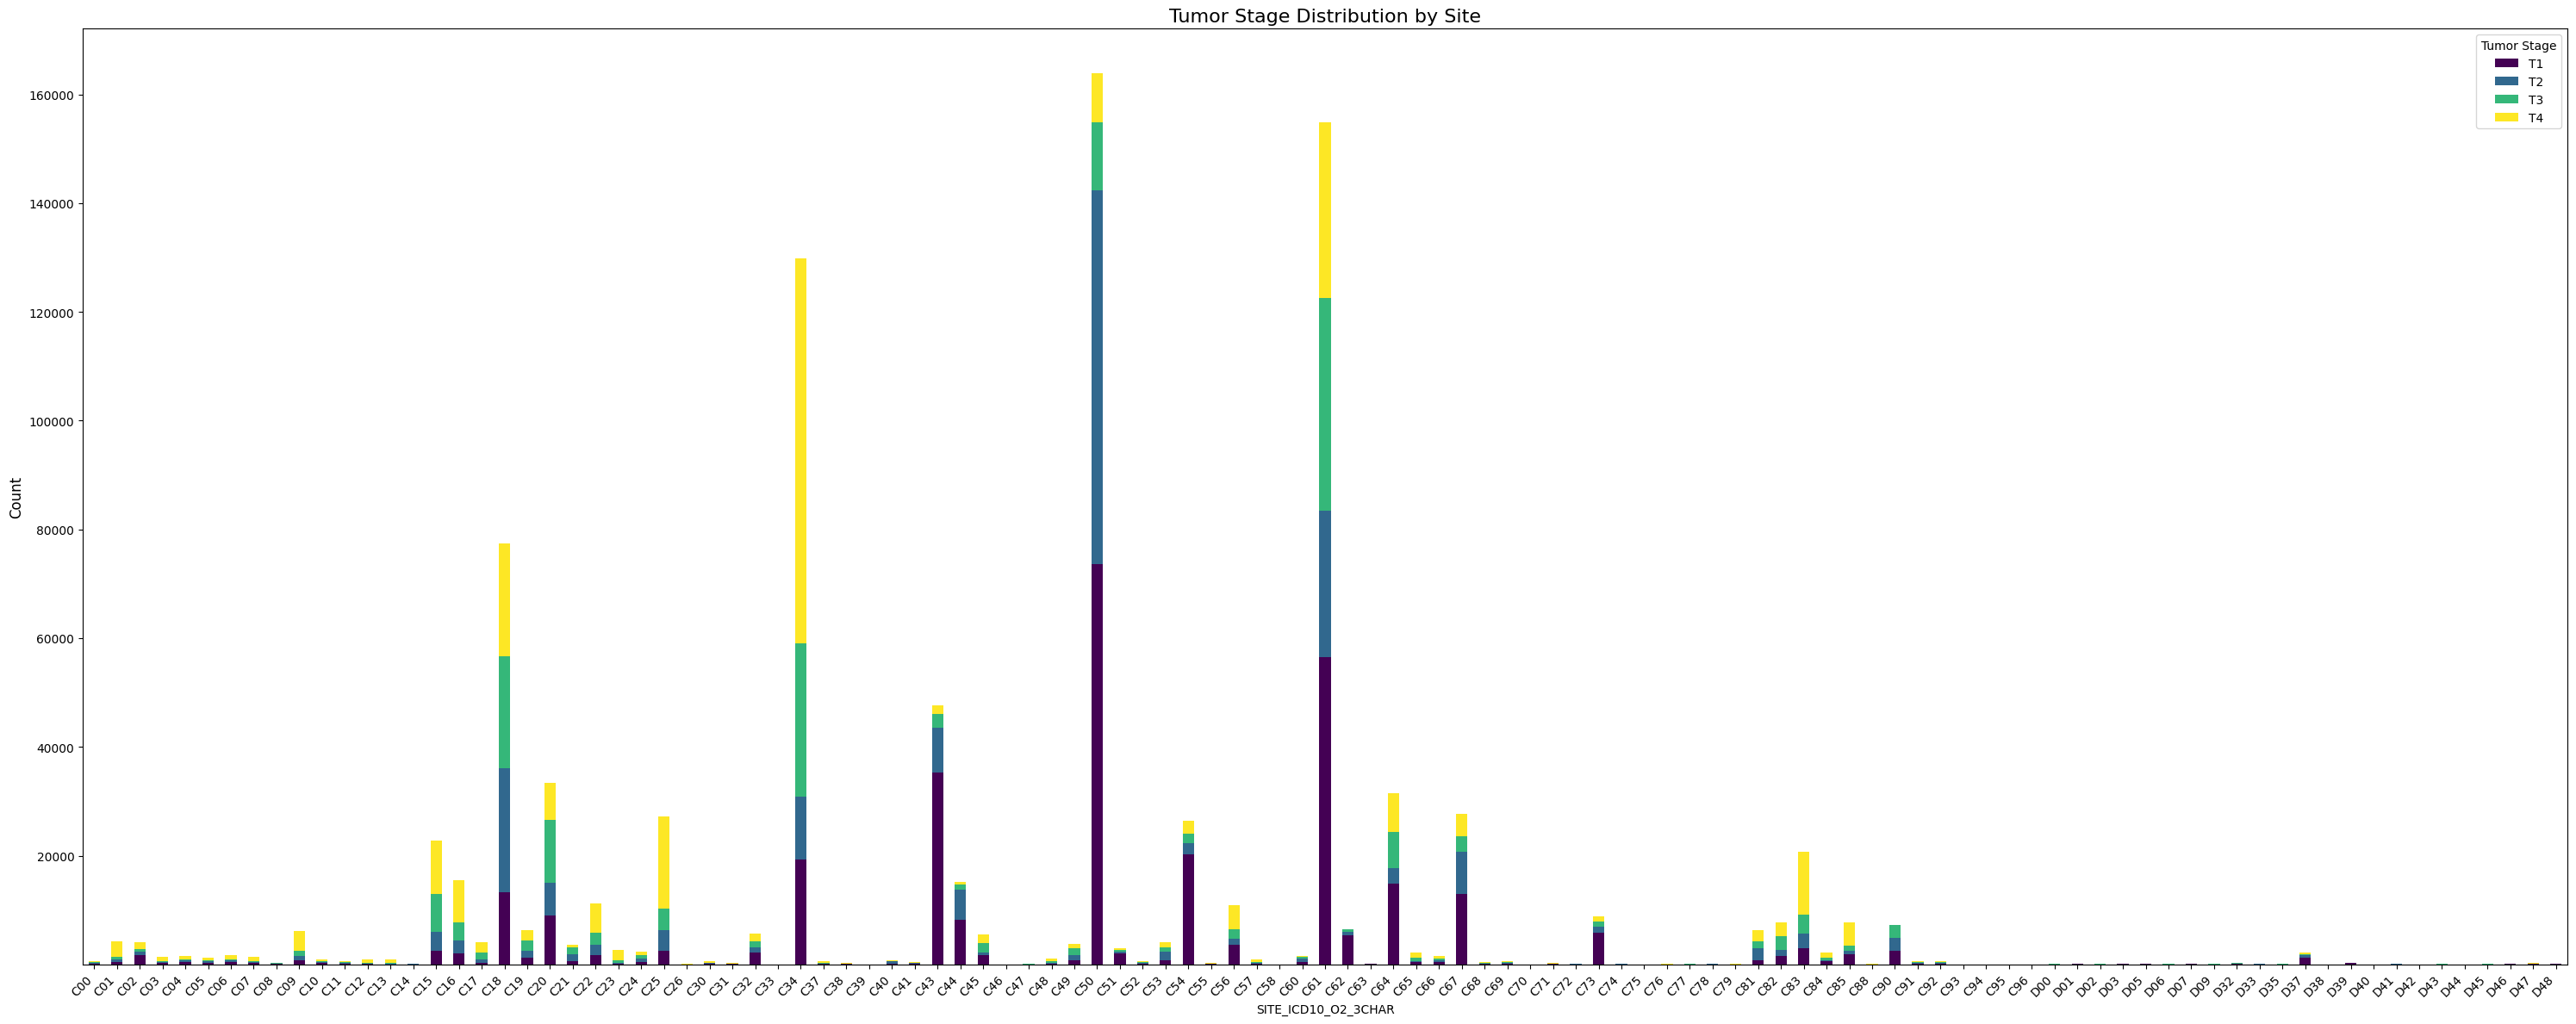

In [46]:
# Group data by site and tumor stage
stage_distribution = (
    tumour_data_filtered.groupby(["SITE_ICD10_O2_3CHAR", "STAGE_BEST_MAPPED"])
    .size()
    .unstack(fill_value=0)
)

# Convert all values to numeric for plotting
stage_distribution = stage_distribution.apply(pd.to_numeric, errors='coerce')

# Plot the stacked bar chart
import matplotlib.pyplot as plt

stage_distribution.plot(kind="bar", stacked=True, figsize=(30, 12), colormap="viridis")

# Add chart details
plt.title("Tumor Stage Distribution by Site", fontsize=16)
plt.ylabel("Site (ICD-10 Code)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Tumor Stage", fontsize=10)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()


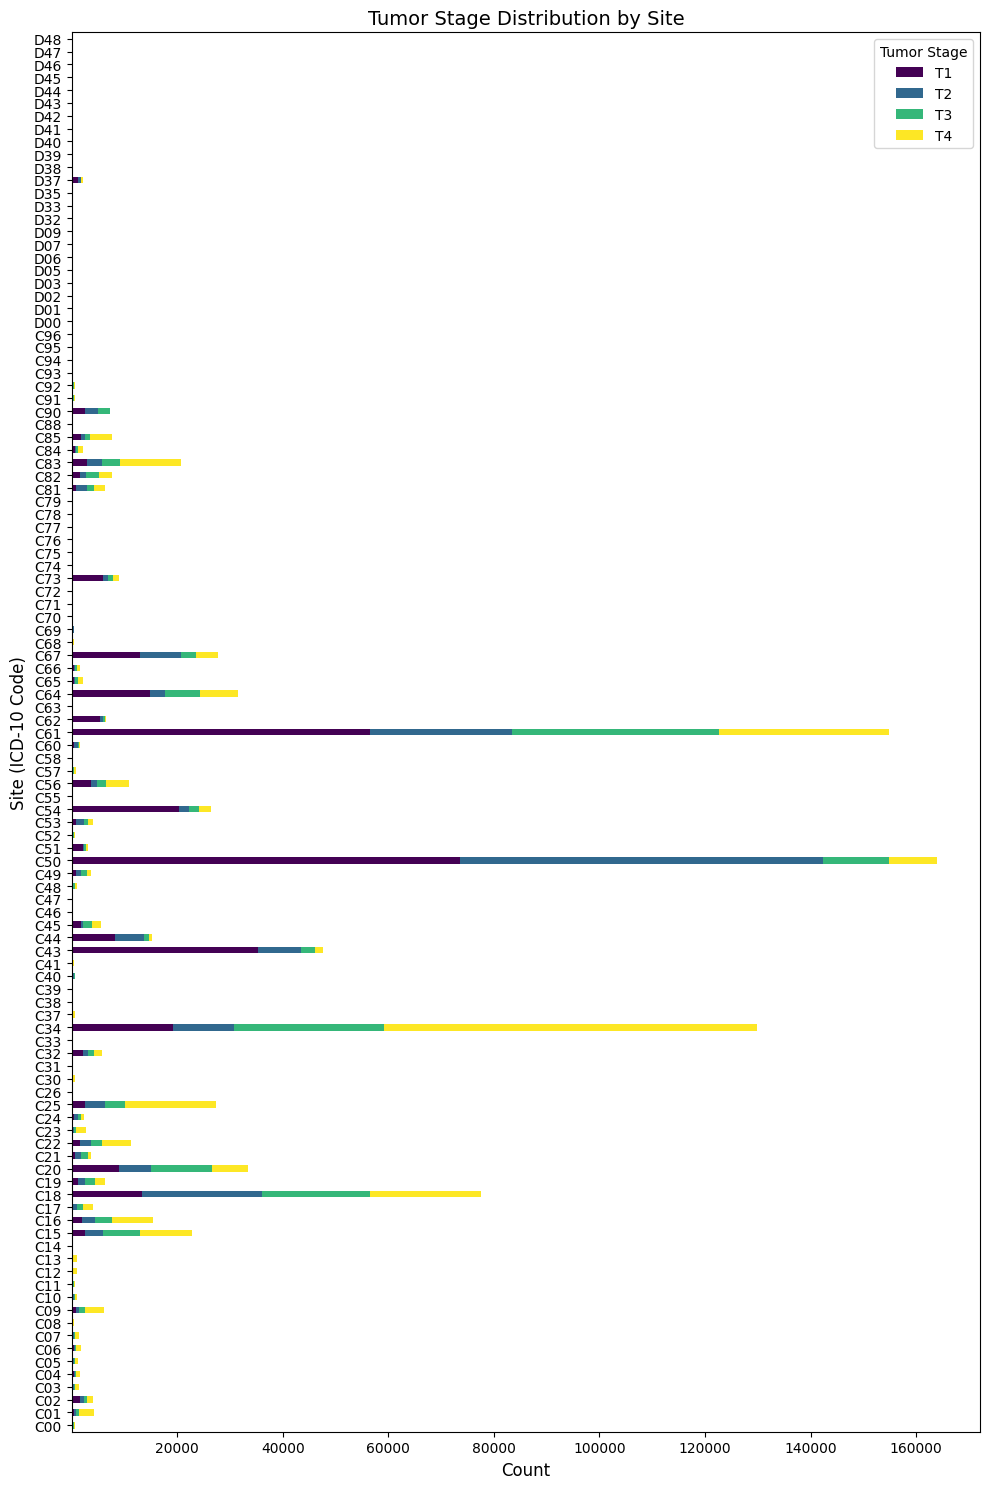

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
tumour_data_path = "C:/Users/wardo/Documents/Internship/cancer_download/Data/sim_av_tumour.csv"

# Read the dataset in chunks to save memory
chunk_size = 100000  # Adjust chunk size for efficiency
columns_to_load = ["STAGE_BEST", "SITE_ICD10_O2_3CHAR"]

tumour_data = pd.DataFrame()

for chunk in pd.read_csv(tumour_data_path, usecols=columns_to_load, chunksize=chunk_size, low_memory=True):
    tumour_data = pd.concat([tumour_data, chunk], ignore_index=True)

# Define manual mapping for tumor stages
stage_mapping_manual = {
    "1": "T1", "1A": "T1", "1B": "T1",
    "2": "T2", "2A": "T2", "2B": "T2",
    "3": "T3", "3A": "T3", "3B": "T3",
    "4": "T4", "4A": "T4", "4B": "T4"
}

# Apply the mapping
tumour_data["STAGE_BEST_MAPPED"] = tumour_data["STAGE_BEST"].map(stage_mapping_manual).fillna("Unknown")

# Filter for valid tumor stages
valid_stages = ["T1", "T2", "T3", "T4"]
tumour_data_filtered = tumour_data[tumour_data["STAGE_BEST_MAPPED"].isin(valid_stages)]

# Group data by tumor stage and site
stage_distribution = (
    tumour_data_filtered.groupby(["SITE_ICD10_O2_3CHAR", "STAGE_BEST_MAPPED"])
    .size()
    .unstack(fill_value=0)
)

# Convert values to numeric for plotting
stage_distribution = stage_distribution.apply(pd.to_numeric, errors="coerce")

# **Horizontal Stacked Bar Chart**
stage_distribution.plot(kind="barh", stacked=True, figsize=(10, 15), colormap="viridis")

# Add chart details
plt.title("Tumor Stage Distribution by Site", fontsize=14)
plt.ylabel("Site (ICD-10 Code)", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.legend(title="Tumor Stage", fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()
